In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
df = pd.read_csv("/content/QMASTOR rail data dump.csv")

<ipython-input-116-28b9e997ed2a>:1: DtypeWarning: Columns (5,19,20,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/QMASTOR rail data dump.csv")


In [117]:
df.head()

,Unnamed: 0,CargoMovementID,CargoMovementName,BU,Customer,Route,NWB trains.NWBPreliminaryDate,NWB trains.NWBConfirmedDate,THTs.T1,THTs.SL,...,Consignment,Cancelled.ReasonGroup,Cancelled.ReasonSubgroup,Cancelled.ReasonCode,Wagons.Planned,Wagons.Actual,Wagons.Tipped,Wagons.Bypassed,Wagons.DTK,Wagons.Tonnes
0,0,34095,Location190Test,Location74 Location194 Coal,Location34,NaN,NaT,NaT,NaT,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,34107,8082367791,Location74 Location194 Coal,Location62,Location190 to Location82,NaT,NaT,2011-09-13 16:45:00,2011-09-13 18:45:00,...,8082367791,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,1000.0
2,2,34107,8082367791,Location74 Location194 Coal,Location62,Location190 to Location82,NaT,NaT,2011-09-13 16:45:00,2011-09-13 18:45:00,...,8082367791,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,1000.0
3,3,34107,8082367791,Location74 Location194 Coal,Location62,Location190 to Location82,NaT,NaT,2011-09-13 16:45:00,2011-09-13 18:45:00,...,8082367791,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,1000.0
4,4,34107,8082367791,Location74 Location194 Coal,Location62,Location190 to Location82,NaT,NaT,2011-09-13 16:45:00,2011-09-13 18:45:00,...,8082367791,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,1000.0


In [118]:
df.shape

(427419, 29)

removing 'Wagons.Tonnes' beacuse of duplicates

In [119]:
df.drop(['Unnamed: 0','Wagons.Tonnes'], axis = 1, inplace = True)

In [120]:
sum(df.duplicated())

394272

In [121]:
df.drop_duplicates(inplace=True)

In [122]:
df.shape

(33147, 27)

# Feature Selection

In [123]:
df.columns

Index(['CargoMovementID', 'CargoMovementName', 'BU', 'Customer', 'Route',
       'NWB trains.NWBPreliminaryDate', 'NWB trains.NWBConfirmedDate',
       'THTs.T1', 'THTs.SL', 'THTs.FL', 'THTs.T2', 'THTs.Departed',
       'CargoMovementStartDate', 'CargoMovementEndDate',
       'Destination.DestinationTransactionDate',
       'NWB trains.SourceTransactionQuantity',
       'Destination.DestinationQuantSum', 'Destination.Split', 'Consignment',
       'Cancelled.ReasonGroup', 'Cancelled.ReasonSubgroup',
       'Cancelled.ReasonCode', 'Wagons.Planned', 'Wagons.Actual',
       'Wagons.Tipped', 'Wagons.Bypassed', 'Wagons.DTK'],
      dtype='object')

In [124]:
df.drop(['CargoMovementID', 'CargoMovementName', 'BU', 'Customer',
       'Route', 'THTs.Departed',
       'CargoMovementStartDate', 'CargoMovementEndDate',
       'Destination.DestinationTransactionDate',
       'NWB trains.SourceTransactionQuantity', 'Destination.Split', 'Consignment',
       'Cancelled.ReasonGroup', 'Cancelled.ReasonSubgroup',
        'Wagons.Tipped', 'Wagons.Bypassed', 'Wagons.DTK'], axis = 1, inplace = True)

In [125]:
df.shape

(33147, 10)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33147 entries, 0 to 427418
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   NWB trains.NWBPreliminaryDate    33147 non-null  object 
 1   NWB trains.NWBConfirmedDate      33147 non-null  object 
 2   THTs.T1                          33147 non-null  object 
 3   THTs.SL                          33147 non-null  object 
 4   THTs.FL                          33147 non-null  object 
 5   THTs.T2                          33147 non-null  object 
 6   Destination.DestinationQuantSum  8010 non-null   float64
 7   Cancelled.ReasonCode             4628 non-null   object 
 8   Wagons.Planned                   6612 non-null   float64
 9   Wagons.Actual                    12641 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.8+ MB


converting object to date type

In [127]:
df['THTs.T1'] = pd.to_datetime(df['THTs.T1'])
df['THTs.T2'] = pd.to_datetime(df['THTs.T2'])
df['THTs.SL'] = pd.to_datetime(df['THTs.SL'])
df['THTs.FL'] = pd.to_datetime(df['THTs.FL'])


# First delay

LD for loading delay = FL - SL

HD for total handling delay = T2-T1

In [128]:
df['LD'] = (df['THTs.FL'] - df['THTs.SL']).dt.total_seconds() / 3600

In [129]:
df['HD'] = (df['THTs.T2'] - df['THTs.T1']).dt.total_seconds() / 3600

In [130]:
df.head()

,NWB trains.NWBPreliminaryDate,NWB trains.NWBConfirmedDate,THTs.T1,THTs.SL,THTs.FL,THTs.T2,Destination.DestinationQuantSum,Cancelled.ReasonCode,Wagons.Planned,Wagons.Actual,LD,HD
0,NaT,NaT,NaT,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN
1,NaT,NaT,2011-09-13 16:45:00,2011-09-13 18:45:00,2011-09-13 22:45:00,2011-09-13 23:45:00,NaN,NaN,NaN,6.0,4.00,7.000000
7,NaT,NaT,2011-09-17 08:10:00,2011-09-17 08:30:00,2011-09-17 13:00:00,2011-09-17 13:05:00,8173.00,NaN,NaN,98.0,4.50,4.916667
105,NaT,NaT,2011-09-24 06:50:00,2011-09-24 07:10:00,2011-09-24 10:55:00,2011-09-24 10:58:00,7640.23,NaN,NaN,92.0,3.75,4.133333
197,NaT,NaT,2011-10-05 11:20:00,2011-10-05 12:15:00,2011-10-05 16:00:00,2011-10-05 16:30:00,8193.98,NaN,NaN,NaN,3.75,5.166667


In [131]:
df_cleaned = df.copy()

In [132]:
# Drop rows with NaN values in 'LD' column
df_cleaned.dropna(subset=['LD'], inplace=True)
df_cleaned.dropna(subset=['HD'], inplace=True)

In [133]:
df_cleaned['LD'].isnull().sum()

0

In [134]:
df_cleaned = df_cleaned[df_cleaned['LD'] >= 0]
df_cleaned = df_cleaned[df_cleaned['HD'] >= 0]

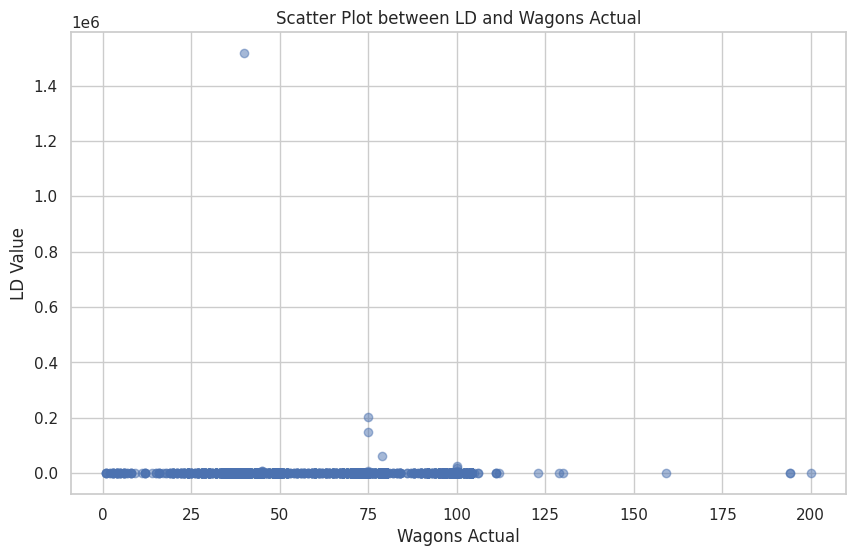

In [135]:
# Set the desired figure size
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(df_cleaned['Wagons.Actual'], df_cleaned['HD'], alpha=0.5)

# Add labels and title
plt.xlabel('Wagons Actual')
plt.ylabel('LD Value')
plt.title('Scatter Plot between LD and Wagons Actual')

# Show the plot
plt.show()



In [136]:
# Calculate the IQR for 'LD' column
Q1 = df_cleaned['LD'].quantile(0.25)
Q3 = df_cleaned['LD'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from 'LD' column
df_cleaned = df_cleaned[(df_cleaned['LD'] >= lower_bound) & (df_cleaned['LD'] <= upper_bound)]

# Now you can proceed to create the scatter plot or any other analysis


# After removing outliers

In [137]:
df1 = pd.read_csv("/content/clean_file.csv")

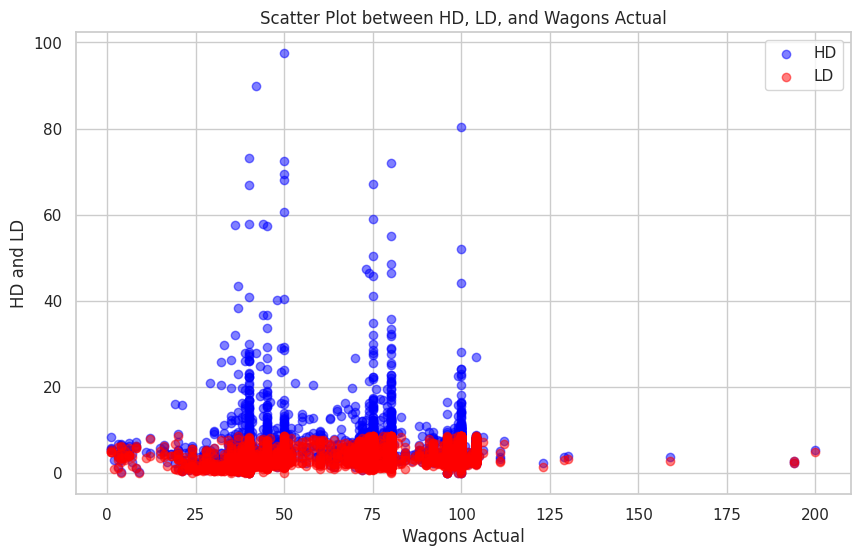

In [138]:

plt.figure(figsize=(10, 6))

# Create a scatter plot for 'HD' values
plt.scatter(df1['Wagons.Actual'],df1['HD'],   color='blue', alpha=0.5, label='HD')

# Create a scatter plot for 'LD' values
plt.scatter(df1['Wagons.Actual'],df1['LD'],  color='red', alpha=0.5, label='LD')

# Add labels and title
plt.xlabel('Wagons Actual')
plt.ylabel('HD and LD')
plt.title('Scatter Plot between HD, LD, and Wagons Actual')

# Add legend
plt.legend()

# Show the plot
plt.show()


### There is a relation between HD (total handling delay) and number of wagons. when number of wagons increase that impact the loading time and, consequently, the departure time of the train.

##### if we take a sample of 20 wagons and multiply it with ''Wagons.Tonnes'' around (62) it will result in non null value of 1250 which is close to 'Destination.DestinationQuantSum' (1238) which prove that lower number of wagons have no sgnificant delay inspite of 50 or more result in higher delay

## Second delay
D = Delay for each cargo movement
#### Delays for each cargo movement by subtracting the requested date for when the train should run (NWBPreliminaryDate) from the confirmed date for when the train will run (NWBConfirmedDate)

In [139]:
df1['NWB trains.NWBPreliminaryDate'] = pd.to_datetime(df1['NWB trains.NWBPreliminaryDate'])
df1['NWB trains.NWBConfirmedDate'] = pd.to_datetime(df1['NWB trains.NWBConfirmedDate'])

In [140]:
df1['D'] = (df1['NWB trains.NWBConfirmedDate'] - df1['NWB trains.NWBPreliminaryDate']).dt.total_seconds() / 3600

In [141]:
df1 = df1[df1['D'] >= 0]


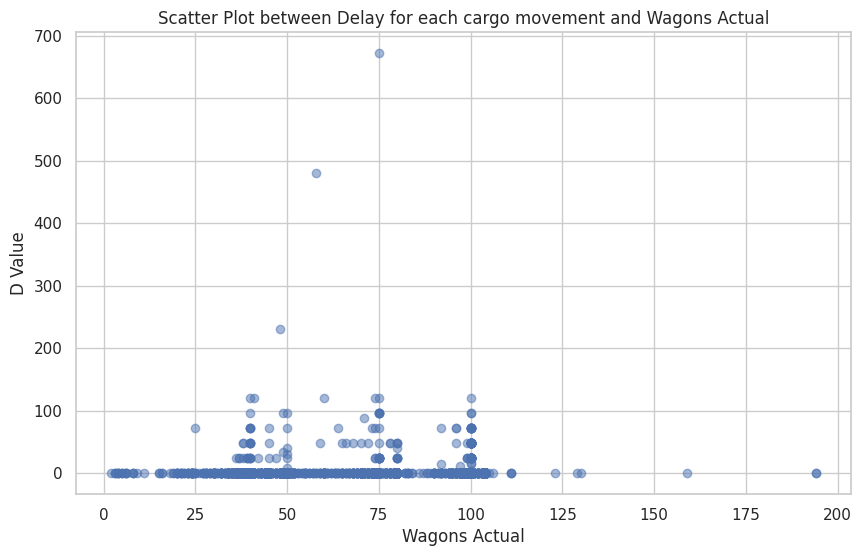

In [142]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
plt.scatter(df1['Wagons.Actual'], df1['D'], alpha=0.5)

# Add labels and title
plt.xlabel('Wagons Actual')
plt.ylabel('D Value')
plt.title('Scatter Plot between Delay for each cargo movement and Wagons Actual')

# Show the plot
plt.show()

The cargo movement delay pattern confirm the total handling delay
which increase with number of wagons from 50 to 100

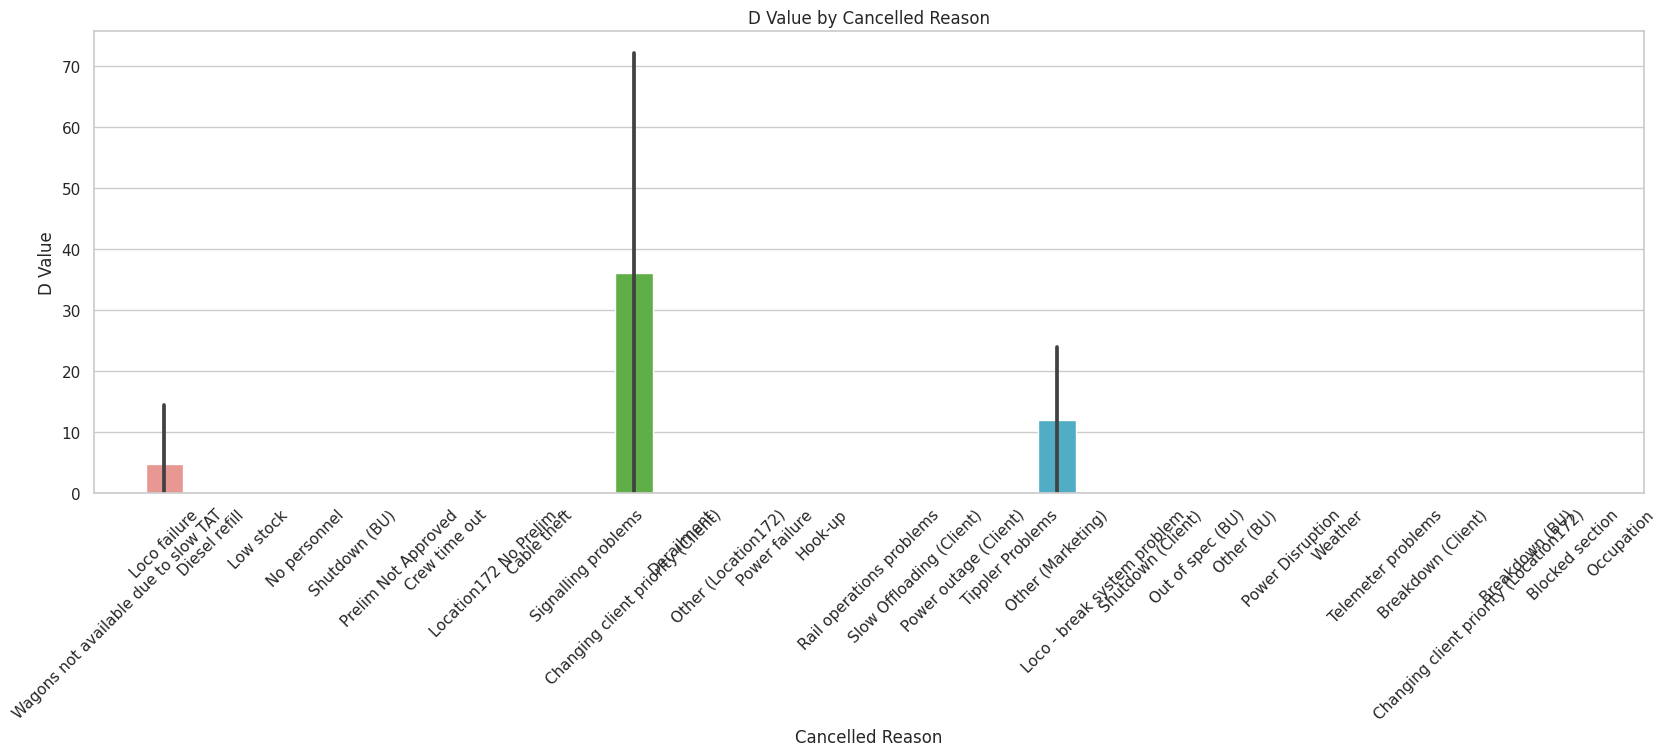

In [143]:
sns.set(style="whitegrid")
plt.figure(figsize=(20, 6))
sns.barplot(data=df1, x='Cancelled.ReasonCode', y='D')
plt.xticks(rotation=45)
plt.xlabel('Cancelled Reason')
plt.ylabel('D Value')
plt.title('D Value by Cancelled Reason')

plt.show()


#### There is a relation between cargo movement delay and signal problems


